<a href="https://colab.research.google.com/github/cesaroliveiragoes/Statistics-for-Data-Science/blob/main/Checkpoint_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 2

## Carregar módulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Carregar dados

In [2]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [3]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [4]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


## Ajustes



- Nomes das colunas

In [5]:
dados_paises_covid.rename(columns={"Province/State": "province", 
                                   "Country/Region": "country"}, 
                          inplace=True)

In [6]:
dados_paises_covid_dead.rename(columns={"Province/State": "province", 
                                        "Country/Region": "country"}, 
                               inplace=True)

In [7]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [8]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                             var_name = 'date', 
                                             value_name = 'infected')

In [9]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                                       var_name = 'date', 
                                                       value_name = 'dead')

In [10]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [11]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [12]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'], 
                                            infer_datetime_format='True')

In [13]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'], 
                                                 infer_datetime_format='True')

In [14]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [15]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [16]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [17]:
dados_paises_covid.shape

(330327, 6)

In [18]:
dados_paises_covid_dead.shape

(330327, 6)

In [19]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead, 
                       on = ['province', 'country',	'Lat',	'Long',	'date'], 
                       how = 'inner')

In [20]:
dados_covid.tail()

,province,country,Lat,Long,date,infected,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276,5671


In [21]:
dados_covid.shape

(330327, 7)

## Aqui começa o trabalho

## *Exemplo probabilidades (memórias de cálculo)

- Prob(infectados covid)

total infectados = soma do total de infectados dos 4 países

total_populacao = soma do total de população dos 4 países

P(infectados) = total infectados / total_populacao

- P(infectado covid e ser Brasileiro)

infectado_e_brasil = total de infectados do Brasil

P(infectado covid e ser Brasileiro) = infectado_e_brasil / total_populacao

- P(Infectado covid | ser Brasileiro)

total_brasil_populacao = populacao do Brasil

P(Infectado covid | ser Brasileiro) = (infectado_e_brasil / total_populacao) / (total_brasil_populacao / total_populacao)

ou

P(Infectado covid | ser Brasileiro) = infectado_e_brasil / total_brasil_populacao

In [22]:
from datetime import datetime, timedelta

In [23]:
np.max(dados_covid['date']) - timedelta(days=365)

Timestamp('2022-03-09 00:00:00')

1 – Filtrar a data mais recente (realizar o processo para buscar a última data de forma automatizada) e os países Brasil, França, E.U.A e Canadá.

In [24]:
lista_paises = ['Brazil', 'France', 'US', 'Canada']
data_maxima = np.max(dados_covid['date'])

In [25]:
dados_covid_agrupados = dados_covid.groupby(['country', 'date'])[['infected', 'dead']].sum().reset_index()


In [26]:
dados_recentes = dados_covid_agrupados[(dados_covid_agrupados['date'] == data_maxima) & (dados_covid_agrupados['country'].isin(lista_paises))]
dados_recentes

,country,date,infected,dead
28574,Brazil,2023-03-09,37076053,699276
38861,Canada,2023-03-09,4617095,51720
73151,France,2023-03-09,39866718,166176
213740,US,2023-03-09,103802702,1123836


2 –Pesquisar populações de Brasil, França, E.U.A. e Canadá. Depois, adicionar estas populações como uma coluna no dataset.

In [27]:
dados_pop = pd.DataFrame({'country':['Brazil','Canada','France','US'],'Population':[214326223,38246108,67749632,331893745]})
dados_pop

,country,Population
0,Brazil,214326223
1,Canada,38246108
2,France,67749632
3,US,331893745


In [28]:
merged_df = pd.merge(dados_covid_agrupados, dados_pop, on=['country'])

In [29]:
data_maxima2 = np.max(merged_df['date'])

dados_pop = merged_df.groupby(['country','date'])[['infected','dead','Population']].sum().reset_index()

In [30]:
dados_populacao = dados_pop[(dados_pop ['date'] == data_maxima) & \
                 (dados_pop['country'].isin(lista_paises))]

dados_populacao

,country,date,infected,dead,Population
1142,Brazil,2023-03-09,37076053,699276,214326223
2285,Canada,2023-03-09,4617095,51720,38246108
3428,France,2023-03-09,39866718,166176,67749632
4571,US,2023-03-09,103802702,1123836,331893745


In [31]:
# OBS: Notar que para esta questão pesquisamos as populações dos países conforme links abaixo:

# https://data.worldbank.org/country/BR?locale=pt
# https://datos.bancomundial.org/pais/estados-unidos
# https://data.worldbank.org/country/CA
# https://datos.bancomundial.org/pais/francia

3 –Considerando   somente   os   dados   dos   países   apresentados,   encontre   as   seguintes probabilidades, baseando-se na coluna de infectados:*Nopróprio arquivo “.ipynb” é apresentado um exemplo.

a) P(infectado covid)

In [32]:
total_pop = dados_populacao['Population'].sum()
total_pop


652215708

In [33]:
total_infectados = dados_populacao['infected'].sum()
total_infectados

185362568

In [34]:
P = total_infectados / total_pop
P_infect_covid = P*100
print(f'A probabilidade de estar infectado por covid é de {P} ou {P_infect_covid} %')

A probabilidade de estar infectado por covid é de 0.2842043908577559 ou 28.42043908577559 %


b)P(infectado covid e ser Brasileiro)

In [35]:
filtro_br = dados_populacao[(dados_populacao['country'] == 'Brazil') & (dados_populacao['infected'])]
filtro_br


,country,date,infected,dead,Population
1142,Brazil,2023-03-09,37076053,699276,214326223


In [36]:
infectado_e_brasil = filtro_br['infected'].sum()
infectado_e_brasil

37076053

In [37]:
p_infect_e_br = (infectado_e_brasil) / (total_pop)
p_infect_e_br_pct = (p_infect_e_br)*100

print(f'A probabilidade de ser infectado por covid e ser brasileiro é de {p_infect_e_br} ou {p_infect_e_br_pct} % ')

A probabilidade de ser infectado por covid e ser brasileiro é de 0.05684630490377579 ou 5.684630490377579 % 


c)P(infectado covid | ser Brasileiro)

In [38]:
filtro_br = dados_populacao[(dados_populacao['country'] == 'Brazil')]
filtro_br


,country,date,infected,dead,Population
1142,Brazil,2023-03-09,37076053,699276,214326223


In [39]:
total_pop_br = filtro_br['Population'].sum()
total_pop_br

214326223

In [40]:
infectado_e_brasil = filtro_br['infected'].sum()
infectado_e_brasil

37076053

In [41]:
p_infect_cvd_br = (infectado_e_brasil / total_pop) / (total_pop_br / total_pop)
p_infect_cvd_br_pct = (p_infect_cvd_br)* 100

print(f'A probabilidade de ser infectado por covid | ser brasileiro é de {p_infect_cvd_br} ou {p_infect_cvd_br_pct} % ')


A probabilidade de ser infectado por covid | ser brasileiro é de 0.17298887873370491 ou 17.298887873370493 % 


d)Compare estes resultados com o mesmo período do ano passado

In [42]:
data = ['2023-03-09', '2022-03-09']
data

['2023-03-09', '2022-03-09']

In [43]:
tabela_br = dados_pop[(dados_pop['country'] == 'Brazil') & (dados_pop['date'].isin(data))]
tabela_br

,country,date,infected,dead,Population
777,Brazil,2022-03-09,29198101,653767,214326223
1142,Brazil,2023-03-09,37076053,699276,214326223


In [44]:
filtro_tabela_br = tabela_br[(tabela_br['date'] == '2022-03-09')]
filtro_tabela_br

,country,date,infected,dead,Population
777,Brazil,2022-03-09,29198101,653767,214326223


In [45]:
infectado_e_brasil_2022 = filtro_tabela_br['infected'].sum()
infectado_e_brasil_2022

29198101

In [46]:
p_infect_e_br_22 = (infectado_e_brasil_2022) / (total_pop)
p_infect_e_br_22

0.04476755257786585

In [47]:
grafico_br = pd.DataFrame({'country':['Brazil','Brazil'],'date':['2022-03-09','2023-03-09'], 'p_infected_e_br': [p_infect_e_br_22, p_infect_e_br]})
grafico_br

,country,date,p_infected_e_br
0,Brazil,2022-03-09,0.044768
1,Brazil,2023-03-09,0.056846


Text(0.5, 1.0, 'P( Infectados covid e ser Brasileiro em  2022-03-09 x 2023-03-09')

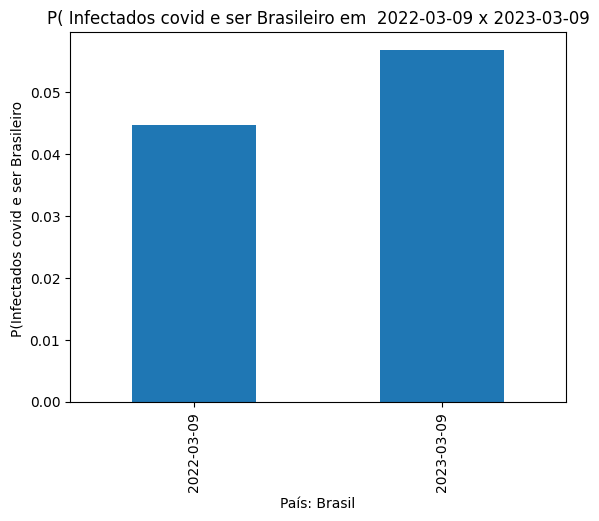

In [48]:
ax = grafico_br.plot.bar(x = 'date', y = 'p_infected_e_br', legend = None)
plt.xlabel('País: Brasil')
plt.ylabel('P(Infectados covid e ser Brasileiro ')
plt.title('P( Infectados covid e ser Brasileiro em  2022-03-09 x 2023-03-09')

In [49]:
p_infect_cvd_br_2022 = (infectado_e_brasil_2022 / total_pop) / (total_pop_br / total_pop)
p_infect_cvd_br_2022

0.13623205126887342

In [50]:
grafico_br_2 = pd.DataFrame({'country':['Brazil','Brazil'],'date':['2022-03-09','2023-03-09'], 'p_infected_cvd_br': [p_infect_cvd_br_2022, p_infect_cvd_br]})
grafico_br_2

,country,date,p_infected_cvd_br
0,Brazil,2022-03-09,0.136232
1,Brazil,2023-03-09,0.172989


Text(0.5, 1.0, 'P( Infectados covid | ser Brasileiro em  2022-03-09 x 2023-03-09')

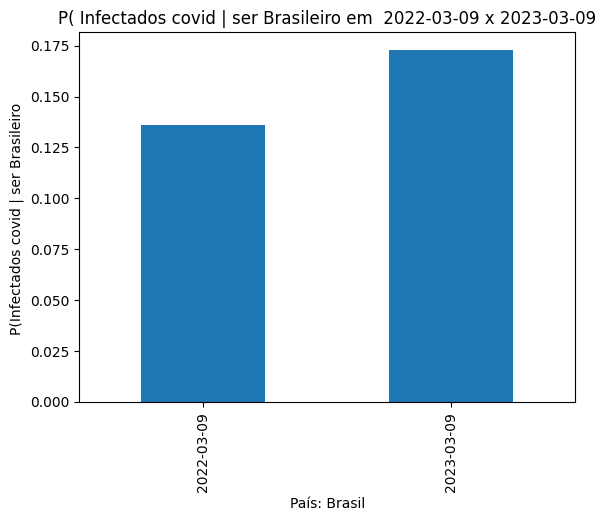

In [51]:
ax = grafico_br_2.plot.bar(x = 'date', y = 'p_infected_cvd_br', legend = None)
plt.xlabel('País: Brasil')
plt.ylabel('P(Infectados covid | ser Brasileiro ')
plt.title('P( Infectados covid | ser Brasileiro em  2022-03-09 x 2023-03-09')

e)P(infectado covid e ser USA)

In [52]:
filtro_usa = dados_populacao[(dados_populacao['country'] == 'US')]
filtro_usa

,country,date,infected,dead,Population
4571,US,2023-03-09,103802702,1123836,331893745


In [53]:
infectado_e_usa = filtro_usa['infected'].sum()
infectado_e_usa

103802702

In [54]:
p_infect_e_usa = (infectado_e_usa) / (total_pop)
p_infect_e_usa_pct = (p_infect_e_usa)*100

print(f'A probabilidade de ser infectado por covid e ser USA é de {p_infect_e_usa} ou {p_infect_e_usa_pct} % ')

A probabilidade de ser infectado por covid e ser USA é de 0.1591539435906993 ou 15.915394359069928 % 


f)P(infectado covid | ser USA)

In [55]:
filtro_usa = dados_populacao[(dados_populacao['country'] == 'US')]
filtro_usa

,country,date,infected,dead,Population
4571,US,2023-03-09,103802702,1123836,331893745


In [56]:
total_pop_usa = filtro_usa['Population'].sum()
total_pop_usa

331893745

In [57]:
infectado_e_usa = filtro_usa['infected'].sum()
infectado_e_usa

103802702

In [58]:
p_infect_cvd_usa = (infectado_e_usa / total_pop) / (total_pop_usa / total_pop)
p_infect_cvd_usa_pct = (p_infect_cvd_usa)* 100

print(f'A probabilidade de ser infectado por covid | ser USA é de {p_infect_cvd_usa} ou {p_infect_cvd_usa_pct} % ')

A probabilidade de ser infectado por covid | ser USA é de 0.31275883792266107 ou 31.275883792266107 % 


g)Compare estes resultados com o mesmo período do ano passado.

In [59]:
data = ['2023-03-09', '2022-03-09']
data

['2023-03-09', '2022-03-09']

In [60]:
tabela_usa = dados_pop[(dados_pop['country'] == 'US') & (dados_pop['date'].isin(data))]
tabela_usa

,country,date,infected,dead,Population
4206,US,2022-03-09,79536060,963275,331893745
4571,US,2023-03-09,103802702,1123836,331893745


In [61]:
filtro_tabela_usa = tabela_usa[(tabela_usa['date'] == '2022-03-09')]
filtro_tabela_usa

,country,date,infected,dead,Population
4206,US,2022-03-09,79536060,963275,331893745


In [62]:
infectado_e_usa_2022 = filtro_tabela_usa['infected'].sum()
infectado_e_usa_2022

79536060

In [63]:
p_infect_e_usa_22 = (infectado_e_usa_2022) / (total_pop)
p_infect_e_usa_22

0.12194747692277291

In [64]:
grafico_usa = pd.DataFrame({'country':['US','US'],'date':['2022-03-09','2023-03-09'], 'p_infected_e_usa': [p_infect_e_usa_22, p_infect_e_usa]})
grafico_usa

,country,date,p_infected_e_usa
0,US,2022-03-09,0.121947
1,US,2023-03-09,0.159154


Text(0.5, 1.0, 'P( Infectados covid e ser US em  2022-03-09 x 2023-03-09')

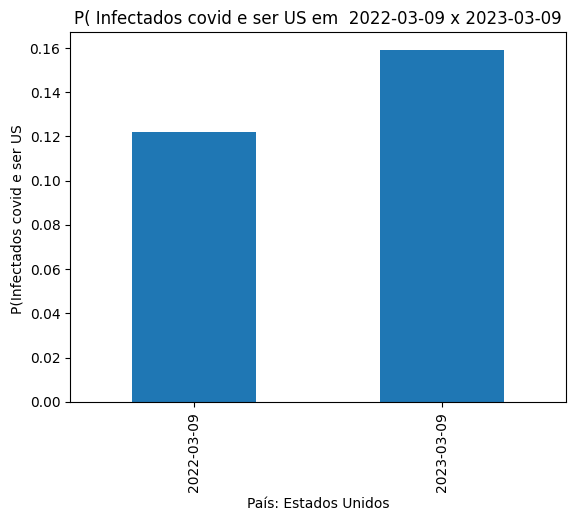

In [65]:
ax = grafico_usa.plot.bar(x = 'date', y = 'p_infected_e_usa', legend = None)
plt.xlabel('País: Estados Unidos')
plt.ylabel('P(Infectados covid e ser US ')
plt.title('P( Infectados covid e ser US em  2022-03-09 x 2023-03-09')

In [66]:
p_infect_cvd_usa_2022 = (infectado_e_usa_2022 / total_pop) / (total_pop_usa / total_pop)
p_infect_cvd_usa_2022

0.23964314241595605

In [67]:
grafico_usa_2 = pd.DataFrame({'country':['US','US'],'date':['2022-03-09','2023-03-09'], 'p_infected_cvd_usa': [p_infect_cvd_usa_2022, p_infect_cvd_usa]})
grafico_usa_2

,country,date,p_infected_cvd_usa
0,US,2022-03-09,0.239643
1,US,2023-03-09,0.312759


Text(0.5, 1.0, 'P( Infectados covid | ser US em  2022-03-09 x 2023-03-09')

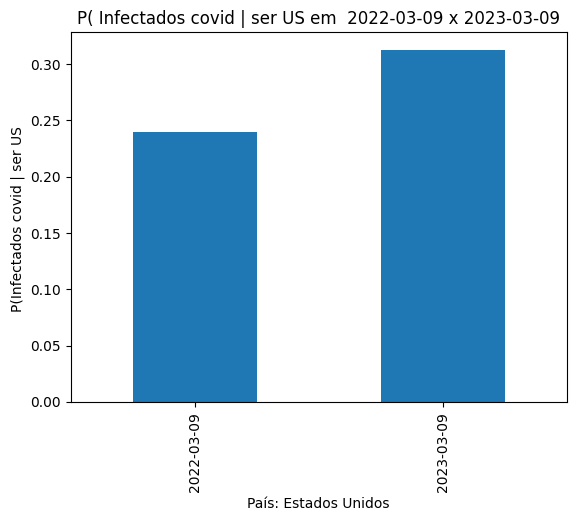

In [68]:
ax = grafico_usa_2.plot.bar(x = 'date', y = 'p_infected_cvd_usa', legend = None)
plt.xlabel('País: Estados Unidos')
plt.ylabel('P(Infectados covid | ser US ')
plt.title('P( Infectados covid | ser US em  2022-03-09 x 2023-03-09')

h)P(infectado covid e ser Canadá)

In [69]:
filtro_canada = dados_populacao[(dados_populacao['country'] == 'Canada')]
filtro_canada

,country,date,infected,dead,Population
2285,Canada,2023-03-09,4617095,51720,38246108


In [70]:
infectado_e_canada = filtro_canada['infected'].sum()
infectado_e_canada

4617095

In [71]:
p_infect_e_canada = (infectado_e_canada) / (total_pop)
p_infect_e_canada_pct = (p_infect_e_canada)*100

print(f'A probabilidade de ser infectado por covid e ser Canadá é de {p_infect_e_canada} ou {p_infect_e_canada_pct} % ')

A probabilidade de ser infectado por covid e ser Canadá é de 0.007079091998808468 ou 0.7079091998808468 % 


i)P(infectado covid | ser Canadá)

In [72]:
filtro_canada = dados_populacao[(dados_populacao['country'] == 'Canada')]
filtro_canada

,country,date,infected,dead,Population
2285,Canada,2023-03-09,4617095,51720,38246108


In [73]:
total_pop_canada = filtro_canada['Population'].sum()
total_pop_canada

38246108

In [74]:
infectado_e_canada = filtro_canada['infected'].sum()
infectado_e_canada

4617095

In [75]:
p_infect_cvd_canada = (infectado_e_canada / total_pop) / (total_pop_canada / total_pop)
p_infect_cvd_canada_pct = (p_infect_cvd_canada)* 100

print(f'A probabilidade de ser infectado por covid | ser Canadá é de {p_infect_cvd_canada} ou {p_infect_cvd_canada_pct} % ')

A probabilidade de ser infectado por covid | ser Canadá é de 0.1207206495364182 ou 12.07206495364182 % 


j)Compare estes resultados com o mesmo período do ano passado.

In [76]:
data = ['2023-03-09', '2022-03-09']
data

['2023-03-09', '2022-03-09']

In [77]:
tabela_canada = dados_pop[(dados_pop['country'] == 'Canada') & (dados_pop['date'].isin(data))]
tabela_canada

,country,date,infected,dead,Population
1920,Canada,2022-03-09,3356440,37158,38246108
2285,Canada,2023-03-09,4617095,51720,38246108


In [78]:
filtro_tabela_canada = tabela_canada[(tabela_canada['date'] == '2022-03-09')]
filtro_tabela_canada

,country,date,infected,dead,Population
1920,Canada,2022-03-09,3356440,37158,38246108


In [79]:
infectado_e_canada_2022 = filtro_tabela_canada['infected'].sum()
infectado_e_canada_2022

3356440

In [80]:
p_infect_e_canada_22 = (infectado_e_canada_2022) / (total_pop)
p_infect_e_canada_22

0.005146211535279368

In [81]:
grafico_canada = pd.DataFrame({'country':['Canada','Canada'],'date':['2022-03-09','2023-03-09'], 'p_infected_e_canada': [p_infect_e_canada_22, p_infect_e_canada]})
grafico_canada

,country,date,p_infected_e_canada
0,Canada,2022-03-09,0.005146
1,Canada,2023-03-09,0.007079


Text(0.5, 1.0, 'P( Infectados covid e ser Canadá em  2022-03-09 x 2023-03-09')

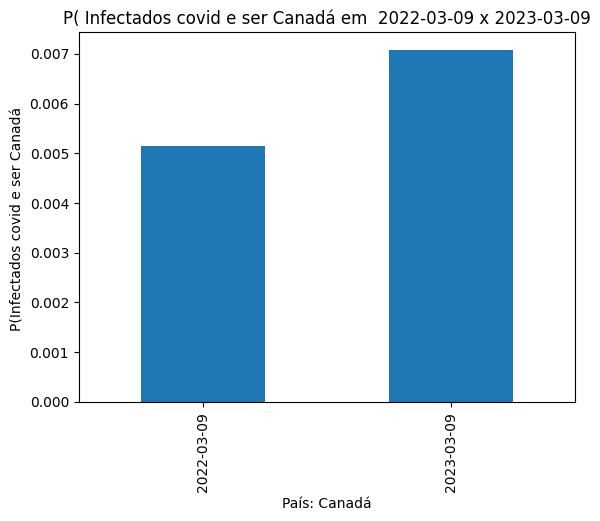

In [82]:
ax = grafico_canada.plot.bar(x = 'date', y = 'p_infected_e_canada', legend = None)
plt.xlabel('País: Canadá')
plt.ylabel('P(Infectados covid e ser Canadá ')
plt.title('P( Infectados covid e ser Canadá em  2022-03-09 x 2023-03-09')

In [83]:
p_infect_cvd_canada_2022 = (infectado_e_canada_2022 / total_pop) / (total_pop_canada / total_pop)
p_infect_cvd_canada_2022

0.08775899498061346

In [84]:
grafico_canada_2 = pd.DataFrame({'country':['Canada','Canada'],'date':['2022-03-09','2023-03-09'], 'p_infected_cvd_canada': [p_infect_cvd_canada_2022, p_infect_cvd_canada]})
grafico_canada_2

,country,date,p_infected_cvd_canada
0,Canada,2022-03-09,0.087759
1,Canada,2023-03-09,0.120721


Text(0.5, 1.0, 'P( Infectados covid | ser Canadá em  2022-03-09 x 2023-03-09')

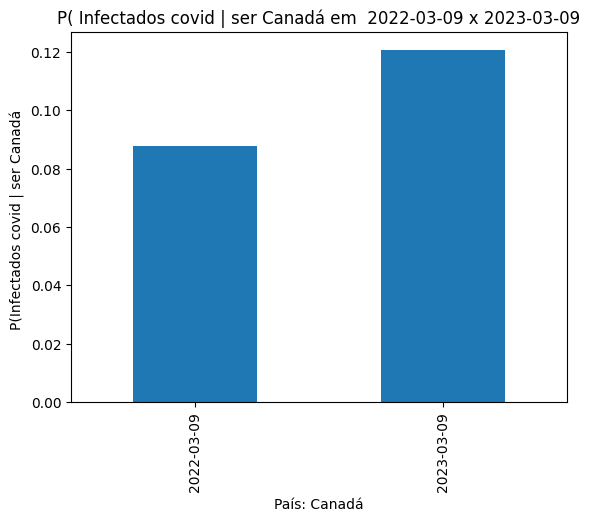

In [85]:
ax = grafico_canada_2.plot.bar(x = 'date', y = 'p_infected_cvd_canada', legend = None)
plt.xlabel('País: Canadá')
plt.ylabel('P(Infectados covid | ser Canadá ')
plt.title('P( Infectados covid | ser Canadá em  2022-03-09 x 2023-03-09')

4 – Encontre as seguintes probabilidades, baseando-se na coluna de mortos:

a) P(morte covid)

In [86]:
total_pop = dados_populacao['Population'].sum()
total_pop

652215708

In [87]:
total_mortos = dados_populacao['dead'].sum()
total_mortos

2041008

In [88]:
P1 = total_mortos / total_pop
P_mortos_covid = P1*100
print(f'A probabilidade de mortos por covid é de {P1} ou {P_mortos_covid} %')

A probabilidade de mortos por covid é de 0.0031293450540446047 ou 0.3129345054044605 %


b) P(morte e ser Brasileiro)

In [89]:
filtro_br = dados_populacao[(dados_populacao['country'] == 'Brazil')]
filtro_br

,country,date,infected,dead,Population
1142,Brazil,2023-03-09,37076053,699276,214326223


In [90]:
mortos_e_br = filtro_br['dead'].sum()
mortos_e_br

699276

In [91]:
p_mortos_e_br = (mortos_e_br) / (total_pop)
p_mortos_e_br_pct = (p_mortos_e_br)*100

print(f'A probabilidade de ser morto por covid e ser Brasil é de {p_mortos_e_br} ou {p_mortos_e_br_pct} % ')

A probabilidade de ser morto por covid e ser Brasil é de 0.001072154490336194 ou 0.1072154490336194 % 


c) P(morte covid | ser Brasileiro)

In [92]:
filtro_br = dados_populacao[(dados_populacao['country'] == 'Brazil')]
filtro_br

,country,date,infected,dead,Population
1142,Brazil,2023-03-09,37076053,699276,214326223


In [93]:
total_pop_br = filtro_br['Population'].sum()
total_pop_br

214326223

In [94]:
mortos_e_br = filtro_br['dead'].sum()
mortos_e_br

699276

In [95]:
p_mortos_cvd_br = (mortos_e_br / total_pop) / (total_pop_br / total_pop)
p_mortos_cvd_br_pct = (p_mortos_cvd_br)* 100

print(f'A probabilidade de ser morto por covid | ser Brasil é de {p_mortos_cvd_br} ou {p_mortos_cvd_br_pct} % ')

A probabilidade de ser morto por covid | ser Brasil é de 0.0032626712224569925 ou 0.32626712224569926 % 


d) Compare estes resultados com o mesmo período do ano passado.

In [96]:
data = ['2023-03-09', '2022-03-09']
data

['2023-03-09', '2022-03-09']

In [97]:
tabela_br_mortos = dados_pop[(dados_pop['country'] == 'Brazil') & (dados_pop['date'].isin(data))]
tabela_br_mortos

,country,date,infected,dead,Population
777,Brazil,2022-03-09,29198101,653767,214326223
1142,Brazil,2023-03-09,37076053,699276,214326223


In [98]:
filtro_tabela_br_mortos = tabela_br_mortos[(tabela_br_mortos['date'] == '2022-03-09')]
filtro_tabela_br_mortos

,country,date,infected,dead,Population
777,Brazil,2022-03-09,29198101,653767,214326223


In [99]:
mortos_e_br_2022 = filtro_tabela_br_mortos['dead'].sum()
mortos_e_br_2022

653767

In [100]:
p_mortos_e_br_22 = (mortos_e_br_2022) / (total_pop)
p_mortos_e_br_22

0.0010023784953060346

In [101]:
grafico_br_mortos = pd.DataFrame({'country':['Brazil','Brazil'],'date':['2022-03-09','2023-03-09'], 'p_mortos_e_br': [p_mortos_e_br_22, p_mortos_e_br]})
grafico_br_mortos

,country,date,p_mortos_e_br
0,Brazil,2022-03-09,0.001002
1,Brazil,2023-03-09,0.001072


Text(0.5, 1.0, 'P( Mortos covid e ser Brasil em  2022-03-09 x 2023-03-09')

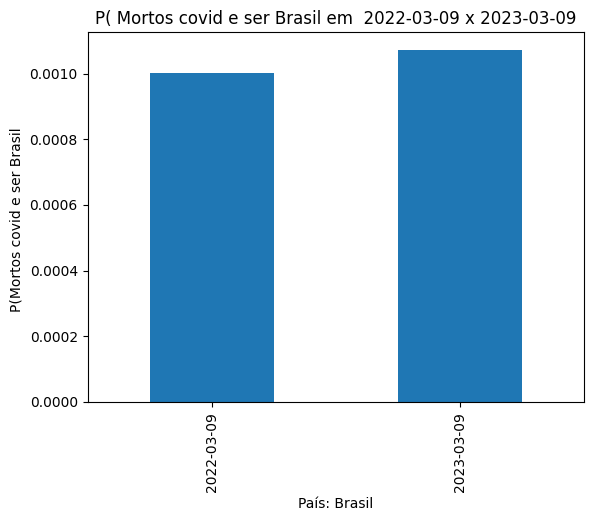

In [102]:
ax = grafico_br_mortos.plot.bar(x = 'date', y = 'p_mortos_e_br', legend = None)
plt.xlabel('País: Brasil')
plt.ylabel('P(Mortos covid e ser Brasil ')
plt.title('P( Mortos covid e ser Brasil em  2022-03-09 x 2023-03-09')

In [103]:
p_mortos_cvd_br_2022 = (mortos_e_br_2022 / total_pop) / (total_pop_br / total_pop)
p_mortos_cvd_br_2022

0.003050336029110167

In [104]:
grafico_br_mortos_2 = pd.DataFrame({'country':['Brazil','Brazil'],'date':['2022-03-09','2023-03-09'], 'p_mortos_cvd_br': [p_mortos_cvd_br_2022, p_mortos_cvd_br]})
grafico_br_mortos_2

,country,date,p_mortos_cvd_br
0,Brazil,2022-03-09,0.003050
1,Brazil,2023-03-09,0.003263


Text(0.5, 1.0, 'P( Infectados covid | ser Brasil em  2022-03-09 x 2023-03-09')

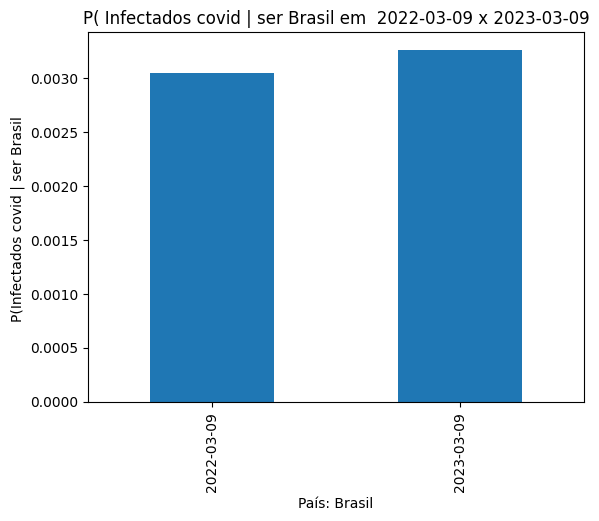

In [105]:
ax = grafico_br_mortos_2.plot.bar(x = 'date', y = 'p_mortos_cvd_br', legend = None)
plt.xlabel('País: Brasil')
plt.ylabel('P(Infectados covid | ser Brasil ')
plt.title('P( Infectados covid | ser Brasil em  2022-03-09 x 2023-03-09')

e) P(morte covid e ser USA)

In [106]:
filtro_usa = dados_populacao[(dados_populacao['country'] == 'US')]
filtro_usa

,country,date,infected,dead,Population
4571,US,2023-03-09,103802702,1123836,331893745


In [107]:
mortos_e_usa = filtro_usa['dead'].sum()
mortos_e_usa

1123836

In [108]:
p_mortos_e_usa = (mortos_e_usa) / (total_pop)
p_mortos_e_usa_pct = (p_mortos_e_usa)*100

print(f'A probabilidade de ser morto por covid e ser USA é de {p_mortos_e_usa} ou {p_mortos_e_usa_pct} % ')

A probabilidade de ser morto por covid e ser USA é de 0.0017231047737967084 ou 0.17231047737967084 % 


f) P(morte covid | ser USA)

In [109]:
filtro_usa = dados_populacao[(dados_populacao['country'] == 'US')]
filtro_usa

,country,date,infected,dead,Population
4571,US,2023-03-09,103802702,1123836,331893745


In [110]:
total_pop_usa = filtro_usa['Population'].sum()
total_pop_usa

331893745

In [111]:
mortos_e_usa = filtro_usa['dead'].sum()
mortos_e_usa

1123836

In [112]:
p_mortos_cvd_usa = (mortos_e_usa / total_pop) / (total_pop_usa / total_pop)
p_mortos_cvd_usa_pct = (p_mortos_cvd_usa)* 100

print(f'A probabilidade de ser morto por covid | ser USA é de {p_mortos_cvd_usa} ou {p_mortos_cvd_usa_pct} % ')

A probabilidade de ser morto por covid | ser USA é de 0.003386131907969522 ou 0.33861319079695223 % 


g) Compare estes resultados com o mesmo período do ano passado.

In [113]:
data = ['2023-03-09', '2022-03-09']
data

['2023-03-09', '2022-03-09']

In [114]:
tabela_usa_mortos = dados_pop[(dados_pop['country'] == 'US') & (dados_pop['date'].isin(data))]
tabela_usa_mortos

,country,date,infected,dead,Population
4206,US,2022-03-09,79536060,963275,331893745
4571,US,2023-03-09,103802702,1123836,331893745


In [115]:
filtro_tabela_usa_mortos = tabela_usa_mortos[(tabela_usa_mortos['date'] == '2022-03-09')]
filtro_tabela_usa_mortos

,country,date,infected,dead,Population
4206,US,2022-03-09,79536060,963275,331893745


In [116]:
mortos_e_usa_2022 = filtro_tabela_usa_mortos['dead'].sum()
mortos_e_usa_2022

963275

In [117]:
p_mortos_e_usa_22 = (mortos_e_usa_2022) / (total_pop)
p_mortos_e_usa_22

0.0014769270169126315

In [118]:
grafico_usa_mortos = pd.DataFrame({'country':['US','US'],'date':['2022-03-09','2023-03-09'], 'p_mortos_e_usa': [p_mortos_e_usa_22, p_mortos_e_usa]})
grafico_usa_mortos

,country,date,p_mortos_e_usa
0,US,2022-03-09,0.001477
1,US,2023-03-09,0.001723


Text(0.5, 1.0, 'P( Mortos covid e ser US em  2022-03-09 x 2023-03-09')

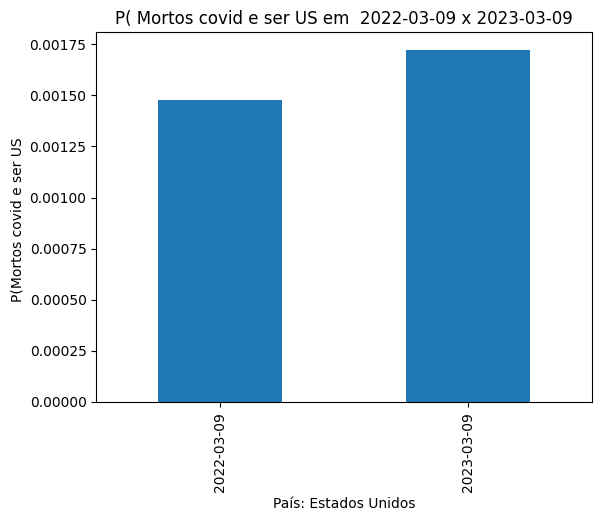

In [119]:
ax = grafico_usa_mortos.plot.bar(x = 'date', y = 'p_mortos_e_usa', legend = None)
plt.xlabel('País: Estados Unidos')
plt.ylabel('P(Mortos covid e ser US ')
plt.title('P( Mortos covid e ser US em  2022-03-09 x 2023-03-09')

In [120]:
p_mortos_cvd_usa_2022 = (mortos_e_usa_2022 / total_pop) / (total_pop_usa / total_pop)
p_mortos_cvd_usa_2022

0.0029023596090971826

In [121]:
grafico_usa_mortos_2 = pd.DataFrame({'country':['US','US'],'date':['2022-03-09','2023-03-09'], 'p_mortos_cvd_usa': [p_mortos_cvd_usa_2022, p_mortos_cvd_usa]})
grafico_usa_mortos_2

,country,date,p_mortos_cvd_usa
0,US,2022-03-09,0.002902
1,US,2023-03-09,0.003386


Text(0.5, 1.0, 'P( Infectados covid | ser US em  2022-03-09 x 2023-03-09')

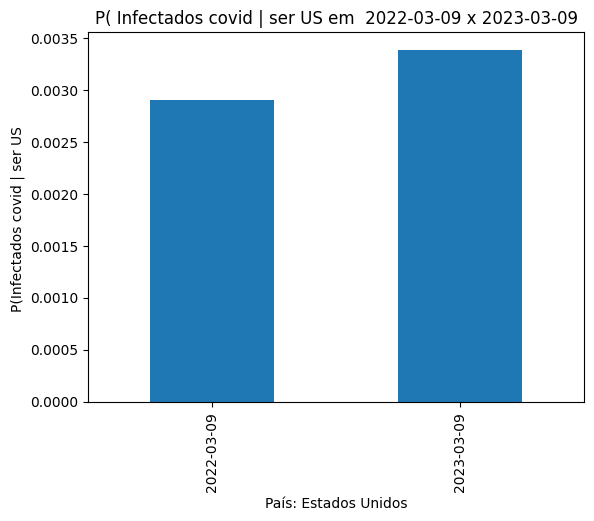

In [122]:
ax = grafico_usa_mortos_2.plot.bar(x = 'date', y = 'p_mortos_cvd_usa', legend = None)
plt.xlabel('País: Estados Unidos')
plt.ylabel('P(Infectados covid | ser US ')
plt.title('P( Infectados covid | ser US em  2022-03-09 x 2023-03-09')

h) P(morte covid e ser Canadá)

In [123]:
filtro_canada = dados_populacao[(dados_populacao['country'] == 'Canada')]
filtro_canada

,country,date,infected,dead,Population
2285,Canada,2023-03-09,4617095,51720,38246108


In [124]:
mortos_e_canada = filtro_canada['dead'].sum()
mortos_e_canada

51720

In [125]:
p_mortos_e_canada = (mortos_e_canada) / (total_pop)
p_mortos_e_canada_pct = (p_mortos_e_canada)*100

print(f'A probabilidade de ser morto por covid e ser Canadá é de {p_mortos_e_canada} ou {p_mortos_e_canada_pct} % ')

A probabilidade de ser morto por covid e ser Canadá é de 7.929891808125541e-05 ou 0.007929891808125542 % 


i) P(morte covid | ser Canadá)

In [126]:
filtro_canada = dados_populacao[(dados_populacao['country'] == 'Canada')]
filtro_canada

,country,date,infected,dead,Population
2285,Canada,2023-03-09,4617095,51720,38246108


In [127]:
total_pop_canada = filtro_canada['Population'].sum()
total_pop_canada

38246108

In [128]:
mortos_e_canada = filtro_canada['dead'].sum()
mortos_e_canada

51720

In [129]:
p_mortos_cvd_canada = (mortos_e_canada / total_pop) / (total_pop_canada / total_pop)
p_mortos_cvd_canada_pct = (p_mortos_cvd_canada)* 100

print(f'A probabilidade de ser morto por covid | ser Canadá é de {p_mortos_cvd_canada} ou {p_mortos_cvd_canada_pct} % ')

A probabilidade de ser morto por covid | ser Canadá é de 0.0013522944609161277 ou 0.13522944609161278 % 


j) Compare estes resultados com o mesmo período do ano passado

In [130]:
data = ['2023-03-09', '2022-03-09']
data

['2023-03-09', '2022-03-09']

In [131]:
tabela_canada_mortos = dados_pop[(dados_pop['country'] == 'Canada') & (dados_pop['date'].isin(data))]
tabela_canada_mortos

,country,date,infected,dead,Population
1920,Canada,2022-03-09,3356440,37158,38246108
2285,Canada,2023-03-09,4617095,51720,38246108


In [132]:
filtro_tabela_canada_mortos = tabela_canada_mortos[(tabela_canada_mortos['date'] == '2022-03-09')]
filtro_tabela_canada_mortos

,country,date,infected,dead,Population
1920,Canada,2022-03-09,3356440,37158,38246108


In [133]:
mortos_e_canada_2022 = filtro_tabela_canada_mortos['dead'].sum()
mortos_e_canada_2022

37158

In [134]:
p_mortos_e_canada_22 = (mortos_e_canada_2022) / (total_pop)
p_mortos_e_canada_22

5.697194891847039e-05

In [135]:
grafico_canada_mortos = pd.DataFrame({'country':['Canada','Canada'],'date':['2022-03-09','2023-03-09'], 'p_mortos_e_canada': [p_mortos_e_canada_22, p_mortos_e_canada]})
grafico_canada_mortos

,country,date,p_mortos_e_canada
0,Canada,2022-03-09,0.000057
1,Canada,2023-03-09,0.000079


Text(0.5, 1.0, 'P( Mortos covid e ser Canadá em  2022-03-09 x 2023-03-09')

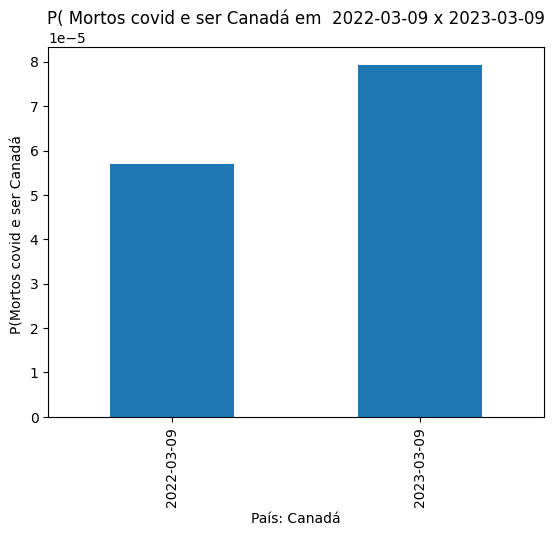

In [136]:
ax = grafico_canada_mortos.plot.bar(x = 'date', y = 'p_mortos_e_canada', legend = None)
plt.xlabel('País: Canadá')
plt.ylabel('P(Mortos covid e ser Canadá ')
plt.title('P( Mortos covid e ser Canadá em  2022-03-09 x 2023-03-09')

In [137]:
p_mortos_cvd_canada_2022 = (mortos_e_canada_2022 / total_pop) / (total_pop_canada / total_pop)
p_mortos_cvd_canada_2022

0.0009715498371755893

In [138]:
grafico_canada_mortos_2 = pd.DataFrame({'country':['Canada','Canada'],'date':['2022-03-09','2023-03-09'], 'p_mortos_cvd_canada': [p_mortos_cvd_canada_2022, p_mortos_cvd_canada]})
grafico_canada_mortos_2

,country,date,p_mortos_cvd_canada
0,Canada,2022-03-09,0.000972
1,Canada,2023-03-09,0.001352


Text(0.5, 1.0, 'P( Infectados covid | ser Canadá em  2022-03-09 x 2023-03-09')

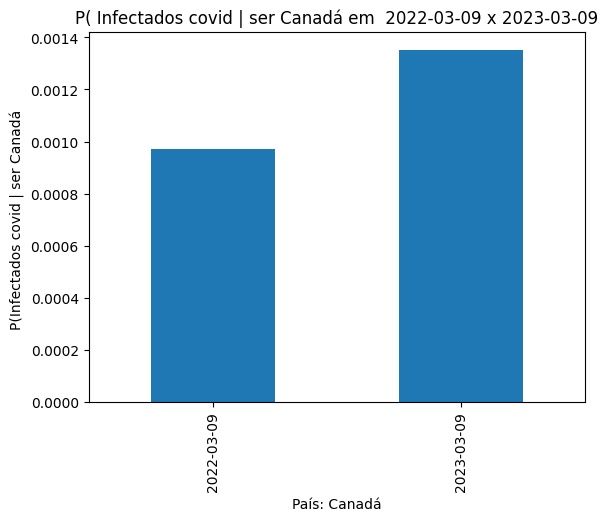

In [139]:
ax = grafico_canada_mortos_2.plot.bar(x = 'date', y = 'p_mortos_cvd_canada', legend = None)
plt.xlabel('País: Canadá')
plt.ylabel('P(Infectados covid | ser Canadá ')
plt.title('P( Infectados covid | ser Canadá em  2022-03-09 x 2023-03-09')

5 – Gerar uma tabela resumo de todos os resultados. Comente as diferenças.

In [140]:
tabela_resumo = pd.DataFrame({'Country':['Brazil','US','Canada'],'P(infectado covid e <País>)':[p_infect_e_br, p_infect_e_usa, p_infect_e_canada],'P(infectado covid | ser <País>)':[p_infect_cvd_br, p_infect_cvd_usa, p_infect_cvd_canada], 'P(morte e ser <País>)':[p_mortos_e_br, p_mortos_e_usa, p_mortos_e_canada], 'P(morte covid | ser <País>)':[p_mortos_cvd_br, p_mortos_cvd_usa, p_mortos_cvd_canada]})
tabela_resumo

,Country,P(infectado covid e <País>),P(infectado covid | ser <País>),P(morte e ser <País>),P(morte covid | ser <País>)
0,Brazil,0.056846,0.172989,0.001072,0.003263
1,US,0.159154,0.312759,0.001723,0.003386
2,Canada,0.007079,0.120721,0.000079,0.001352


In [141]:
# Comentários:

# Podemos notar que tabela indica diferenças nas probabilidades de infecção e morte por COVID-19 em três países: Canadá, Brasil e US. 
# Os US apresentam as maiores probabilidades de infecção e morte, enquanto o Canadá tem os menores índices. 
# Isso indica que a probabilidade de morrer por COVID-19 é semelhante nos três países, uma vez que a pessoa já está infectada. 
# Entretendo, reforçamos que é importante lembrar que esses números podem mudar com o tempo, dependendo de vários fatores, como medidas de 
# prevenção adotadas pelos governos e capacidade do sistema de saúde
